### Required Assignment 5.1: Will the Customer Accept the Coupon?

**Context**

Imagine driving through town and a coupon is delivered to your cell phone for a restaurant near where you are driving. Would you accept that coupon and take a short detour to the restaurant? Would you accept the coupon but use it on a subsequent trip? Would you ignore the coupon entirely? What if the coupon was for a bar instead of a restaurant? What about a coffee house? Would you accept a bar coupon with a minor passenger in the car? What about if it was just you and your partner in the car? Would weather impact the rate of acceptance? What about the time of day?

Obviously, proximity to the business is a factor on whether the coupon is delivered to the driver or not, but what are the factors that determine whether a driver accepts the coupon once it is delivered to them? How would you determine whether a driver is likely to accept a coupon?

**Overview**

The goal of this project is to use what you know about visualizations and probability distributions to distinguish between customers who accepted a driving coupon versus those that did not.

**Data**

This data comes to us from the UCI Machine Learning repository and was collected via a survey on Amazon Mechanical Turk. The survey describes different driving scenarios including the destination, current time, weather, passenger, etc., and then ask the person whether he will accept the coupon if he is the driver. Answers that the user will drive there ‘right away’ or ‘later before the coupon expires’ are labeled as ‘Y = 1’ and answers ‘no, I do not want the coupon’ are labeled as ‘Y = 0’.  There are five different types of coupons -- less expensive restaurants (under \$20), coffee houses, carry out & take away, bar, and more expensive restaurants (\$20 - $50).

In [9]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


**Deliverables**

Your final product should be a brief report that highlights the differences between customers who did and did not accept the coupons.  To explore the data you will utilize your knowledge of plotting, statistical summaries, and visualization using Python. You will publish your findings in a public facing github repository as your first portfolio piece.





### Data Description
Keep in mind that these values mentioned below are average values.

The attributes of this data set include:
1. User attributes
    -  Gender: male, female
    -  Age: below 21, 21 to 25, 26 to 30, etc.
    -  Marital Status: single, married partner, unmarried partner, or widowed
    -  Number of children: 0, 1, or more than 1
    -  Education: high school, bachelors degree, associates degree, or graduate degree
    -  Occupation: architecture & engineering, business & financial, etc.
    -  Annual income: less than \\$12500, \\$12500 - \\$24999, \\$25000 - \\$37499, etc.
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she buys takeaway food: 0, less than 1, 1 to 3, 4 to 8 or greater
    than 8
    -  Number of times that he/she goes to a coffee house: 0, less than 1, 1 to 3, 4 to 8 or
    greater than 8
    -  Number of times that he/she eats at a restaurant with average expense less than \\$20 per
    person: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    

2. Contextual attributes
    - Driving destination: home, work, or no urgent destination
    - Location of user, coupon and destination: we provide a map to show the geographical
    location of the user, destination, and the venue, and we mark the distance between each
    two places with time of driving. The user can see whether the venue is in the same
    direction as the destination.
    - Weather: sunny, rainy, or snowy
    - Temperature: 30F, 55F, or 80F
    - Time: 10AM, 2PM, or 6PM
    - Passenger: alone, partner, kid(s), or friend(s)


3. Coupon attributes
    - time before it expires: 2 hours or one day

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

### Problems

Use the prompts below to get started with your data analysis.  

1. Read in the `coupons.csv` file.




In [11]:
data = pd.read_csv('/content/coupons.csv')

In [4]:
data.head()

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,1
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,0
2,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,1
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0


2. Investigate the dataset for missing or problematic data.

In [12]:
#Let's take a look at the data to determine missing data
data.info()
data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12684 entries, 0 to 12683
Data columns (total 26 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   destination           12684 non-null  object
 1   passanger             12684 non-null  object
 2   weather               12684 non-null  object
 3   temperature           12684 non-null  int64 
 4   time                  12684 non-null  object
 5   coupon                12684 non-null  object
 6   expiration            12684 non-null  object
 7   gender                12684 non-null  object
 8   age                   12684 non-null  object
 9   maritalStatus         12684 non-null  object
 10  has_children          12684 non-null  int64 
 11  education             12684 non-null  object
 12  occupation            12684 non-null  object
 13  income                12684 non-null  object
 14  car                   108 non-null    object
 15  Bar                   12577 non-null

,temperature,has_children,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
count,12684.000000,12684.000000,12684.0,12684.000000,12684.000000,12684.000000,12684.000000,12684.000000
mean,63.301798,0.414144,1.0,0.561495,0.119126,0.214759,0.785241,0.568433
std,19.154486,0.492593,0.0,0.496224,0.323950,0.410671,0.410671,0.495314
min,30.000000,0.000000,1.0,0.000000,0.000000,0.000000,0.000000,0.000000
25%,55.000000,0.000000,1.0,0.000000,0.000000,0.000000,1.000000,0.000000
50%,80.000000,0.000000,1.0,1.000000,0.000000,0.000000,1.000000,1.000000
75%,80.000000,1.000000,1.0,1.000000,0.000000,0.000000,1.000000,1.000000
max,80.000000,1.000000,1.0,1.000000,1.000000,1.000000,1.000000,1.000000


3. Decide what to do about your missing data -- drop, replace, other...

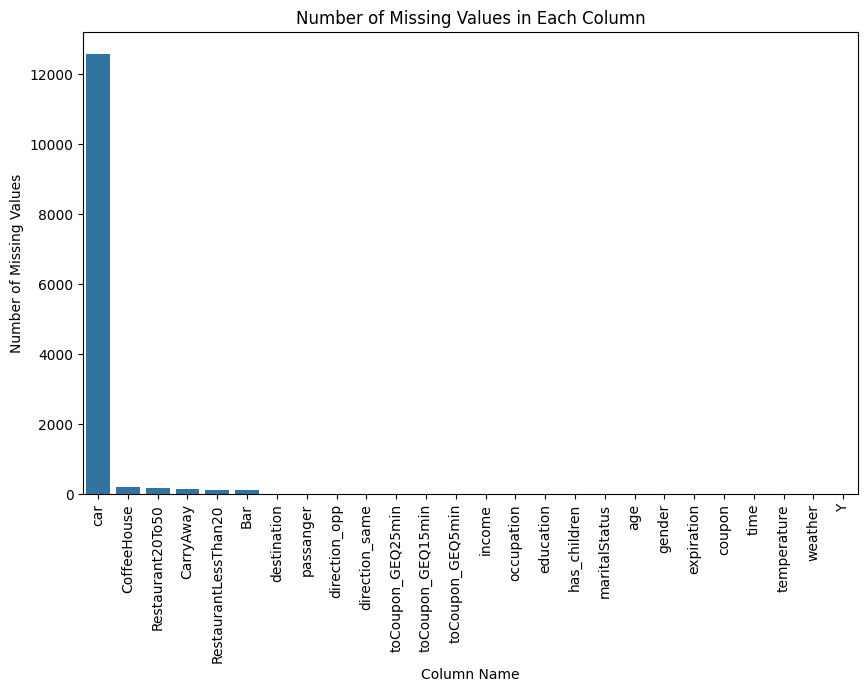

In [14]:
# Let's look at the data to determing columns with large set of missing data in assending order
missing_vc = data.isna().sum().sort_values(ascending=False)
missing_vc

plt.figure(figsize=(10, 6))
sns.barplot(x=missing_vc.index, y=missing_vc.values)
plt.xticks(rotation=90)
plt.xlabel('Column Name')
plt.ylabel('Number of Missing Values')
plt.title('Number of Missing Values in Each Column')
plt.show()


In [15]:
#Let's loop through and get % of missing data by column to get a good view of usable data

columns_to_check = ['car', 'Bar', 'CoffeeHouse', 'CarryAway', 'RestaurantLessThan20', 'Restaurant20To50']

for column in columns_to_check:
    missing_percentage = data[column].isnull().sum() / data.shape[0] * 100
    print(f"Percentage of {column} rows that are missing data: {missing_percentage:.2f}%")


Percentage of car rows that are missing data: 99.15%
Percentage of Bar rows that are missing data: 0.84%
Percentage of CoffeeHouse rows that are missing data: 1.71%
Percentage of CarryAway rows that are missing data: 1.19%
Percentage of RestaurantLessThan20 rows that are missing data: 1.02%
Percentage of Restaurant20To50 rows that are missing data: 1.49%


In [16]:
#car has a large number of missing rows, let's drop them
data.drop('car',axis=1, inplace=True)

#check that the data was dropped
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12684 entries, 0 to 12683
Data columns (total 25 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   destination           12684 non-null  object
 1   passanger             12684 non-null  object
 2   weather               12684 non-null  object
 3   temperature           12684 non-null  int64 
 4   time                  12684 non-null  object
 5   coupon                12684 non-null  object
 6   expiration            12684 non-null  object
 7   gender                12684 non-null  object
 8   age                   12684 non-null  object
 9   maritalStatus         12684 non-null  object
 10  has_children          12684 non-null  int64 
 11  education             12684 non-null  object
 12  occupation            12684 non-null  object
 13  income                12684 non-null  object
 14  Bar                   12577 non-null  object
 15  CoffeeHouse           12467 non-null

4. What proportion of the total observations chose to accept the coupon?



In [17]:
# What proportion of the total observations chose to accept the coupon?
acceptance_rate = data['Y'].value_counts(normalize=True)[1]*100
print(f"The proportion of total observations that accepted the coupon is {acceptance_rate:.2f}%")

The proportion of total observations that accepted the coupon is 56.84%


5. Use a bar plot to visualize the `coupon` column.

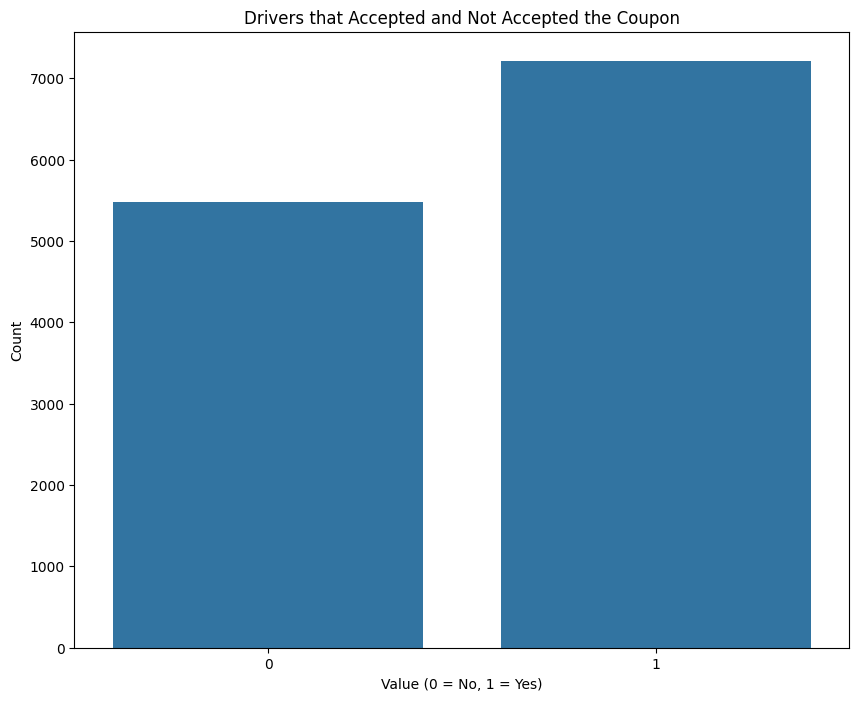

In [21]:
# Use a bar plot to visualize the coupon column
# Set figure size
plt.figure(figsize=(10, 8))

# Create a countplot showing the distribution of the Y values
# Ensure '0' and '1' are interpreted as strings to match the palette keys
sns.countplot(data=data, x='Y')

# Set labels and title
plt.title('Drivers that Accepted and Not Accepted the Coupon')
plt.xlabel('Value (0 = No, 1 = Yes)')
plt.ylabel('Count')

# Display the plot
plt.show()

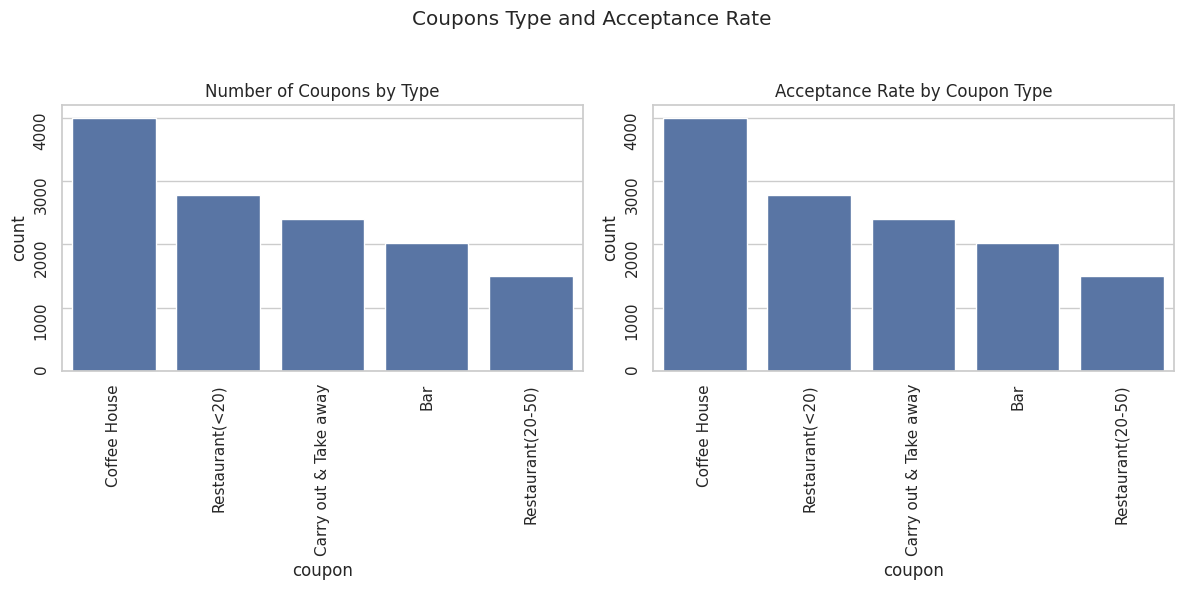

In [25]:
# Create subplots
fig, axes = plt.subplots(1, 2, figsize=(12, 6), sharey=False)
fig.suptitle('Coupons Type and Acceptance Rate')

# Plot number of coupons by type
sns.countplot(ax=axes[0], data=data, x='coupon', order=data['coupon'].value_counts().index)
axes[0].set_title('Number of Coupons by Type')
axes[0].tick_params(labelrotation=90)

# Plot acceptance rate by coupon type
sns.countplot(ax=axes[1], data=data, x='coupon', order=data['coupon'].value_counts().index)
axes[1].set_title('Acceptance Rate by Coupon Type')
axes[1].tick_params(labelrotation=90)

# Adjust spacing between subplots
plt.tight_layout(rect=[0, 0, 1, 0.95])  # Leave space for the suptitle

# Display the plot
plt.show()

6. Use a histogram to visualize the temperature column.

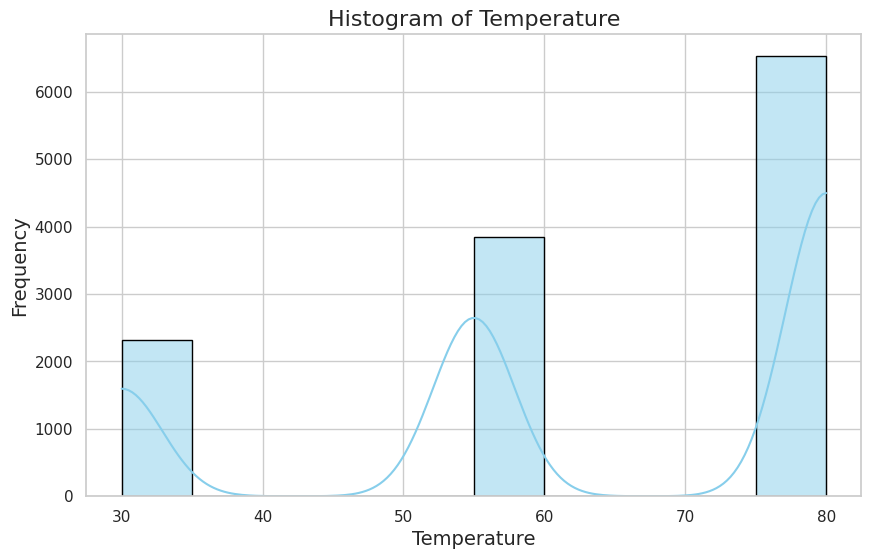

In [26]:
# Use a histogram to visualize the temperature column
# Set Seaborn's whitegrid style for a clean look
sns.set(style="whitegrid")

# Create a figure with a specific size
plt.figure(figsize=(10, 6))

# Plot a histogram of the 'temperature' column with KDE and customized appearance
sns.histplot(data['temperature'], kde=True, bins=10, color='skyblue', edgecolor='black')

# Set the title and labels with a larger font size
plt.title('Histogram of Temperature', fontsize=16)
plt.xlabel('Temperature', fontsize=14)
plt.ylabel('Frequency', fontsize=14)

# Display the plot
plt.show()

**Investigating the Bar Coupons**

Now, we will lead you through an exploration of just the bar related coupons.  

1. Create a new `DataFrame` that contains just the bar coupons.


In [27]:
# Create a new DataFrame that contains only the rows with bar coupons
df_bar_data = data.query('coupon == "Bar"')

# Display the first few rows to verify the data
df_bar_data.head()


,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
9,No Urgent Place,Kid(s),Sunny,80,10AM,Bar,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0
13,Home,Alone,Sunny,55,6PM,Bar,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,1,0,1
17,Work,Alone,Sunny,55,7AM,Bar,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,1,0,1,0
24,No Urgent Place,Friend(s),Sunny,80,10AM,Bar,1d,Male,21,Single,...,less1,4~8,4~8,less1,1,0,0,0,1,1
35,Home,Alone,Sunny,55,6PM,Bar,1d,Male,21,Single,...,less1,4~8,4~8,less1,1,0,0,1,0,1


2. What proportion of bar coupons were accepted?


The proportion of bar coupons that were accepted is 41.00%


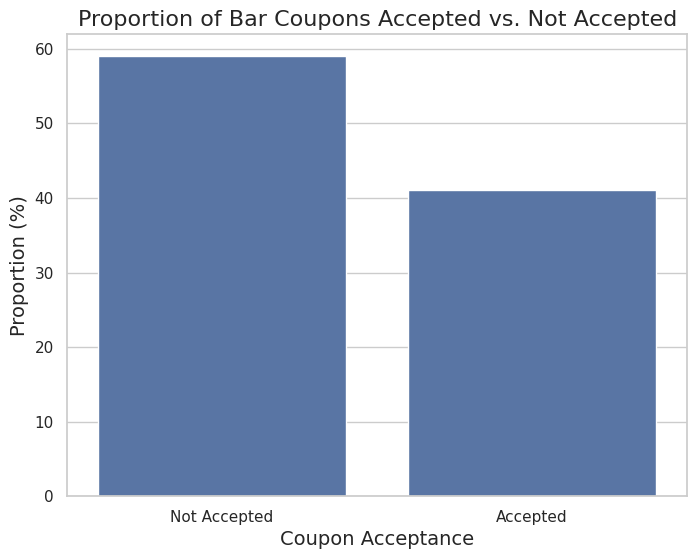

In [28]:
# Proportion of bar coupons were accepted
# Calculate the proportion of accepted (Y == 1) bar coupons
# Calculate the proportion of accepted (Y == 1) and not accepted (Y == 0) bar coupons
accepted_proportion = df_bar_data['Y'].value_counts(normalize=True) * 100

# Print the proportion of accepted bar coupons
print(f'The proportion of bar coupons that were accepted is {accepted_proportion[1]:.2f}%')

# Plot the proportion of accepted vs. not accepted bar coupons
plt.figure(figsize=(8, 6))
sns.barplot(x=['Not Accepted', 'Accepted'], y=accepted_proportion)

# Add title and labels
plt.title('Proportion of Bar Coupons Accepted vs. Not Accepted', fontsize=16)
plt.xlabel('Coupon Acceptance', fontsize=14)
plt.ylabel('Proportion (%)', fontsize=14)

# Show the plot
plt.show()

3. Compare the acceptance rate between those who went to a bar 3 or fewer times a month to those who went more.


Count of values:
bar_frequency
More than 3    1050
3 or Less       967
Name: count, dtype: int64

Proportion:
bar_frequency
More than 3    0.520575
3 or Less      0.479425
Name: proportion, dtype: float64


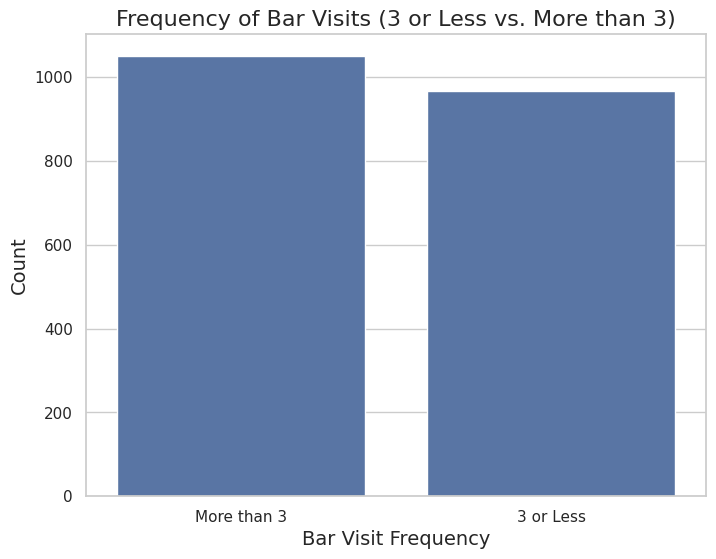

In [29]:
# List of values representing frequency of 3 or fewer visits per month
frequency_3_or_less = ['less1', '1~3']

# Create a copy of the df_bar_data DataFrame
df_frequency_3_or_less = df_bar_data.copy()

# Categorize 'Bar' column values into '3 or Less' and 'More than 3'
df_frequency_3_or_less['bar_frequency'] = df_frequency_3_or_less['Bar'].apply(
    lambda x: '3 or Less' if x in frequency_3_or_less else 'More than 3'
)

# Display count of values in the 'bar_frequency' column
print('Count of values:')
print(df_frequency_3_or_less['bar_frequency'].value_counts())

# Display proportion of values in the 'bar_frequency' column
print('\nProportion:')
print(df_frequency_3_or_less['bar_frequency'].value_counts(normalize=True))

plt.figure(figsize=(8, 6))
sns.countplot(x='bar_frequency', data=df_frequency_3_or_less)

# Add title and labels
plt.title('Frequency of Bar Visits (3 or Less vs. More than 3)', fontsize=16)
plt.xlabel('Bar Visit Frequency', fontsize=14)
plt.ylabel('Count', fontsize=14)

# Show the plot
plt.show()

In [33]:
# Acceptance rate
# 3 or less
print('3 or less')
print(df_frequency_3_or_less.query('bar_frequency == "3 or Less"')['Y'].value_counts(normalize = True))

# More than 3
print('\nMore than 3')
print(df_frequency_3_or_less.query('bar_frequency == "More than 3"')['Y'].value_counts(normalize = True))

3 or less
Y
1    0.527404
0    0.472596
Name: proportion, dtype: float64

More than 3
Y
0    0.698095
1    0.301905
Name: proportion, dtype: float64


4. Compare the acceptance rate between drivers who go to a bar more than once a month and are over the age of 25 to the all others.  Is there a difference?


In [35]:
#Compare the acceptance rate between drivers who go to a bar more than once a month and are over the age of 25 to all others.  Is there a difference?
#Categories for frequency of visiting a bar more than once a month
more_than_once = ['1~3', '4~8', 'gt8']
age_below_25 = ['below21', '21']

# Copy the df_bar_data dataframe
df_gt1_gt25 = df_bar_data.copy()

# Create a new column to classify people who are over 25 and go to a bar more than once a month
df_gt1_gt25['gt1_age_gt25'] = df_gt1_gt25.apply(lambda x: (x['Bar'] in more_than_once) and (x['age'] not in age_below_25), axis=1)

# Calculate acceptance rate for those who are over 25 and go to a bar more than once a month
accept_rate_gt1_gt25 = df_gt1_gt25[df_gt1_gt25['gt1_age_gt25']]['Y'].mean() * 100

# Calculate acceptance rate for all others
accept_rate_others = df_gt1_gt25[~df_gt1_gt25['gt1_age_gt25']]['Y'].mean() * 100

# Print the results
print(f'Acceptance rate for drivers who go to a bar more than once a month and are over 25: {accept_rate_gt1_gt25:.2f}%')
print(f'Acceptance rate for all other drivers: {accept_rate_others:.2f}%')

# Check if there is a difference
if accept_rate_gt1_gt25 > accept_rate_others:
    print("Drivers who go to a bar more than once a month and are over 25 have a higher acceptance rate.")
else:
    print("All other drivers have a higher acceptance rate or there's no significant difference.")

Acceptance rate for drivers who go to a bar more than once a month and are over 25: 69.52%
Acceptance rate for all other drivers: 33.50%
Drivers who go to a bar more than once a month and are over 25 have a higher acceptance rate.


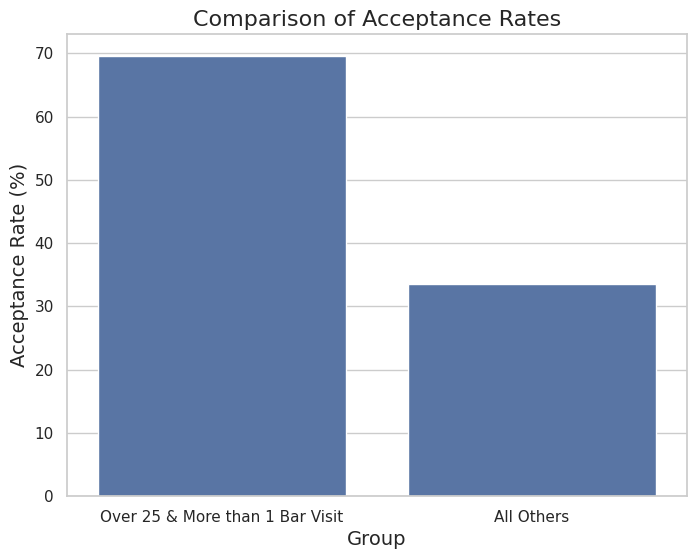

In [31]:
#Let's creat a barplot of the data

# Store the acceptance rates in a dictionary and convert to a DataFrame
acceptance_data = {
    'Group': ['Over 25 & More than 1 Bar Visit', 'All Others'],
    'Acceptance Rate (%)': [accept_rate_gt1_gt25, accept_rate_others]
}

df_acceptance = pd.DataFrame(acceptance_data)

# Plot the acceptance rates using a bar plot
plt.figure(figsize=(8, 6))

# Create a bar plot
sns.barplot(x='Group', y='Acceptance Rate (%)', data=df_acceptance)

# Set the title and labels
plt.title('Comparison of Acceptance Rates', fontsize=16)
plt.xlabel('Group', fontsize=14)
plt.ylabel('Acceptance Rate (%)', fontsize=14)

# Display the plot
plt.show()

5. Use the same process to compare the acceptance rate between drivers who go to bars more than once a month and had passengers that were not a kid and had occupations other than farming, fishing, or forestry.


Acceptance rate for drivers meeting the conditions: 71.32%
Acceptance rate for all other drivers: 29.60%


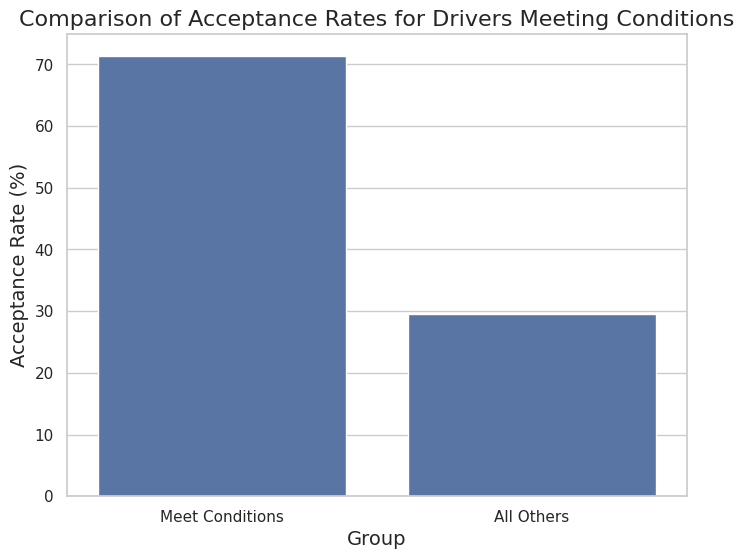

In [32]:
#Use the same process to compare the acceptans rate between drivers who go to the bars mnore than once a month and had passengers that were not a kid and had occupations other than farming, fishing or foresty.
# Filter for bar-related coupons data
bar_coupons_df = data[data['coupon'] == 'Bar']

# Define the conditions:
# 1. Drivers who go to bars more than once a month ('1~3', '4~8', 'gt8')
# 2. Passengers are not kids (i.e., excluding 'Kid(s)')
# 3. Occupation is not in ['Farming', 'Fishing', 'Forestry']
frequent_bar_visitors = ['1~3', '4~8', 'gt8']
non_kid_passengers = 'Kid(s)'
excluded_occupations = ['Farming', 'Fishing', 'Forestry']

# Apply conditions:
# 1. Drivers who go to bars more than once a month
# 2. Drivers who had passengers other than kids
# 3. Drivers whose occupations are not in Farming, Fishing, or Forestry
drivers_meeting_conditions = (
    bar_coupons_df['Bar'].isin(frequent_bar_visitors) &
    (bar_coupons_df['passanger'] != non_kid_passengers) &
    (~bar_coupons_df['occupation'].isin(excluded_occupations))
)

# Group 1: Drivers who meet the conditions
acceptance_rate_meeting_conditions = bar_coupons_df[drivers_meeting_conditions]['Y'].mean() * 100

# Group 2: Drivers who do not meet the conditions
acceptance_rate_other_drivers = bar_coupons_df[~drivers_meeting_conditions]['Y'].mean() * 100

# Print the acceptance rates
print(f"Acceptance rate for drivers meeting the conditions: {acceptance_rate_meeting_conditions:.2f}%")
print(f"Acceptance rate for all other drivers: {acceptance_rate_other_drivers:.2f}%")

# Prepare data for visualization
acceptance_data = {
    'Group': ['Meet Conditions', 'All Others'],
    'Acceptance Rate (%)': [acceptance_rate_meeting_conditions, acceptance_rate_other_drivers]
}

df_acceptance = pd.DataFrame(acceptance_data)

# visualization
acceptance_data = {
    'Group': ['Meet Conditions', 'All Others'],
    'Acceptance Rate (%)': [acceptance_rate_meeting_conditions, acceptance_rate_other_drivers]
}

df_acceptance = pd.DataFrame(acceptance_data)

# Plot the results
plt.figure(figsize=(8, 6))
sns.barplot(x='Group', y='Acceptance Rate (%)', data=df_acceptance)

# Set title and labels
plt.title('Comparison of Acceptance Rates for Drivers Meeting Conditions', fontsize=16)
plt.xlabel('Group', fontsize=14)
plt.ylabel('Acceptance Rate (%)', fontsize=14)

# Show the plot
plt.show()

6. Compare the acceptance rates between those drivers who:

- go to bars more than once a month, had passengers that were not a kid, and were not widowed *OR*
- go to bars more than once a month and are under the age of 30 *OR*
- go to cheap restaurants more than 4 times a month and income is less than 50K.



Acceptance rate for those who meet any condition: 56.93%
Acceptance rate for those who meet none: 33.19%


/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


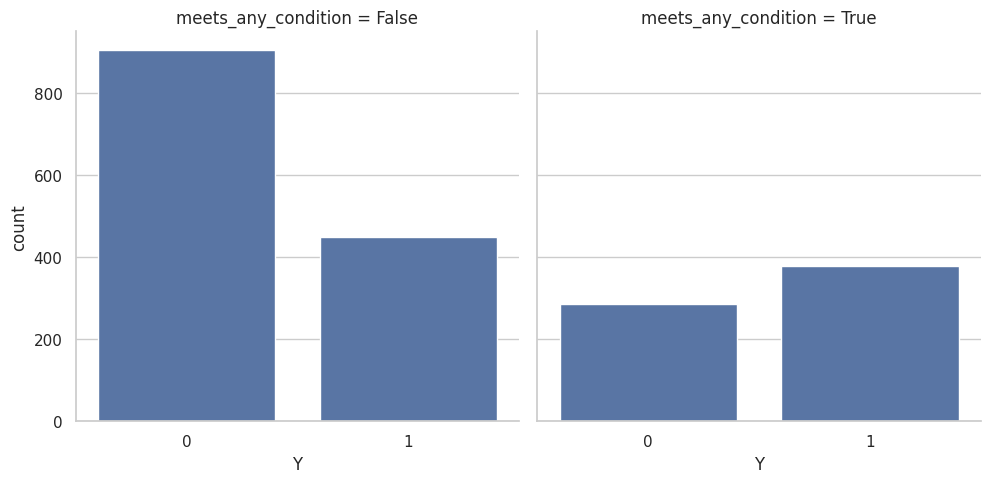

In [37]:
# Compare the acceptance rates between drivers who:
# 1. Go to bars more than once a month, had passengers that were not a die, and were not widowed OR
# 2. Go to bars more than once a month and are under the age of 30 OR
# 3. Go to cheap restaurants more than 4 times a month and income is less than 50k

# Conditions
bar_frequencies_more_than_once = ['1~3', '4~8', 'gt8']
non_kid_passengers = ['Alone', 'Kid(s)']
widowed_status = ['Widowed']
cheap_restaurant_frequencies = ['4~8', 'gt8']
income_below_50k = ['Less than $12500', '$12500 - $24999', '$25000 - $37499', '$37500 - $49999']

data_bar = bar_coupons_df

# 1: Drivers who go to bars more than once a month, had passengers that were not kids, and were not widowed
condition_1 = (
    (data_bar['Bar'].isin(bar_frequencies_more_than_once)) &
    (~data_bar['passanger'].isin(non_kid_passengers)) &
    (~data_bar['maritalStatus'].isin(widowed_status))
)

# 2: Drivers who go to bars more than once a month and are under the age of 30
condition_2 = (
    (data_bar['Bar'].isin(bar_frequencies_more_than_once)) &
    (data_bar['age'].replace({'below21': 20, '50plus': 50}).fillna(0).astype(int) < 30))


# 3: Drivers who go to cheap restaurants more than 4 times a month and have an income less than 50K
condition_3 = (
    (data_bar['RestaurantLessThan20'].isin(cheap_restaurant_frequencies)) &
    (data_bar['income'].isin(income_below_50k))
)

# Combine all conditions using OR
data_bar.loc[:,'meets_any_condition'] = condition_1 | condition_2 | condition_3

# Calculate acceptance rates
acceptance_rate_conditions_met = data_bar[data_bar['meets_any_condition']]['Y'].mean() * 100
acceptance_rate_no_conditions_met = data_bar[~data_bar['meets_any_condition']]['Y'].mean() * 100

print(f"Acceptance rate for those who meet any condition: {acceptance_rate_conditions_met:.2f}%")
print(f"Acceptance rate for those who meet none: {acceptance_rate_no_conditions_met:.2f}%")

# Plot comparison of acceptance rates
sns.catplot(data=data_bar, x='Y', col='meets_any_condition', kind='count')

# Show the plot
plt.show()

7.  Based on these observations, what do you hypothesize about drivers who accepted the bar coupons?

In [ ]:
#Across these groups, high acceptance rates point to younger
# frequent bar-goers without kids or family commitments
# being prime candidates for bar coupon promotions.
# The slight differences in rates come down to specific life factors,
# but overall, the trend aligns with the expectations.


### Independent Investigation

Using the bar coupon example as motivation, you are to explore one of the other coupon groups and try to determine the characteristics of passengers who accept the coupons.  

In this analysis, we examine whether a driver’s destination (e.g., home, work, or no urgent destination) impacts the likelihood of accepting a coupon. The destination data is grouped to calculate the acceptance rate (the proportion of drivers accepting the coupon) for each driving destination.

['No Urgent Place' 'Home' 'Work']
Acceptance rates by driving destination:
destination
Home               50.633302
No Urgent Place    63.377367
Work               50.221239
Name: Y, dtype: float64


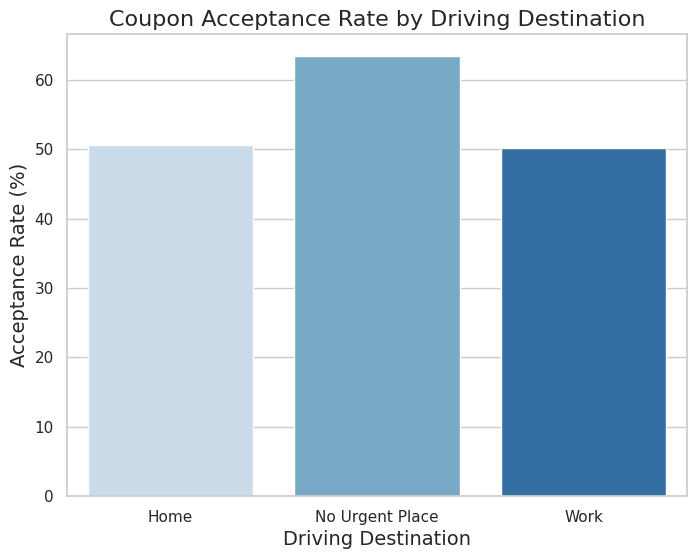

In [ ]:
#  Explore Destination Influence on Coupon Acceptance:

print(data['destination'].unique())

# Step 2: Calculate acceptance rates based on driving destination
acceptance_rates_by_destination = data.groupby('destination')['Y'].mean() * 100

# Step 3: Print the results
print("Acceptance rates by driving destination:")
print(acceptance_rates_by_destination)

# Step 4: Plot the comparison
plt.figure(figsize=(8, 6))
sns.barplot(x=acceptance_rates_by_destination.index, y=acceptance_rates_by_destination.values, hue=acceptance_rates_by_destination.index, palette='Blues', legend=False)
plt.title('Coupon Acceptance Rate by Driving Destination', fontsize=16)
plt.xlabel('Driving Destination', fontsize=14)
plt.ylabel('Acceptance Rate (%)', fontsize=14)
plt.show()

The coupon acceptance rates vary based on the driver's destination:

No Urgent Place: Drivers with no specific destination show the highest acceptance rate at 63.38%. This suggests that drivers who are not in a rush may be more likely to take advantage of a coupon offer.
Home: Drivers heading home have an acceptance rate of 50.63%. While they are not in a rush, they may have fewer opportunities or willingness to deviate from their route.
Work: Drivers heading to work exhibit the lowest acceptance rate at 50.22%, indicating that time constraints and work obligations may make them less likely to accept coupons.
Key Observation:
Drivers with no urgent destination are more likely to accept a coupon, potentially due to having more flexibility and fewer constraints on their travel plans.